Google Trends only provides daily data for short time periods (the official limit is 90 days but it appears that daily values can be obtained for up to 9 months). During each period the data are scaled such that the period with the maximum volume of queries is set as 100 and other periods are given relative weights.

To join longer periods of data it is possible that we can get data from two overlapping periods and use the ratio between the observations from each of these periods to transform the rest of the series.

The problem is that Google does not release information about how the trends are calculated and it is unclear whether it is possible to use transformations to recover the daily trend.

In [191]:
import pandas as pd
import glob
from datetime import datetime

The raw Google Trends files have been downloaded and the first two lines fo each have been deleted.

In [193]:
data=[]
for f in glob.glob('data/*.csv'):
    print(f)
    if 'week' not in f:
        name = f.split('data/')[1][:-4]
        df = pd.read_csv(f)
        #print(name)
        dates = list(df['Day'])
        dates = [datetime.strptime(x,'%m/%d/%y') for x in dates]
        df['date'] = dates
        df = df.set_index(pd.Series(df['date']))
        del df['Day']
        del df['date']
        data.append((name,df))

data/30-days.csv
data/90-days.csv


In [194]:
for i,d in enumerate(data):
    print(i,d[0])

0 30-days
1 90-days


In [195]:
thirty=data[0][1]
ninety=data[1][1]
thirty.columns = ['ukip_','bf_']
merged = pd.concat([thirty,ninety],axis=1)
merged = merged['20170118':]

The table below contains two different versions of the trends data over approximately a month. The first was obtained by asking Google to return the results for a 30 day period (thirty) the second was obtained by asking for data covering a 90 day period (ninety). The values below show that the daily scores are quite different in the two periods. 

For now we are just concerned with the first group in each, ukip.

In [199]:
merged

,ukip_,bf_,ukip,bf
date,,,,
2017-01-18,52.0,9.0,13,2
2017-01-19,53.0,10.0,16,2
2017-01-20,50.0,11.0,13,4
2017-01-21,79.0,10.0,20,2
2017-01-22,57.0,12.0,18,2
2017-01-23,57.0,13.0,12,2
2017-01-24,57.0,13.0,17,3
2017-01-25,58.0,10.0,13,2
2017-01-26,54.0,7.0,13,3


In [200]:
merged.describe()

,ukip_,bf_,ukip,bf
count,28.000000,28.000000,28.000000,28.000000
mean,60.678571,14.214286,15.714286,3.285714
std,13.630178,4.825527,3.172301,1.150109
min,39.000000,7.000000,12.000000,2.000000
25%,52.750000,11.000000,13.000000,2.000000
50%,57.000000,13.000000,16.000000,3.000000
75%,64.000000,17.000000,17.000000,4.000000
max,100.000000,31.000000,27.000000,6.000000


In [208]:
merged = merged+1 #Adding one to every cell to prevent division errors

We can divide the values in one realisation of the time series by the values in the other realisation to determine if they are simply different ratios. 

In [201]:
merged['ukip_ratio'] = merged['ukip']/merged['ukip_'] #ratio of thirty day to ninety day
merged['ukip_ratio_2'] = merged['ukip_']/merged['ukip'] #ratio of ninety to thirty day

In [202]:
merged

,ukip_,bf_,ukip,bf,ukip_ratio,ukip_ratio_2
date,,,,,,
2017-01-18,52.0,9.0,13,2,0.250000,4.000000
2017-01-19,53.0,10.0,16,2,0.301887,3.312500
2017-01-20,50.0,11.0,13,4,0.260000,3.846154
2017-01-21,79.0,10.0,20,2,0.253165,3.950000
2017-01-22,57.0,12.0,18,2,0.315789,3.166667
2017-01-23,57.0,13.0,12,2,0.210526,4.750000
2017-01-24,57.0,13.0,17,3,0.298246,3.352941
2017-01-25,58.0,10.0,13,2,0.224138,4.461538
2017-01-26,54.0,7.0,13,3,0.240741,4.153846


The two new columns that the ratio between the values of each realization differ for each observation. This suggests that it is going to be difficult to transform them as we cannot simply multiply or divide one of them by a constant to get the other series. We can see this visually below.

In [182]:
import matplotlib.pyplot as plt
%matplotlib inline

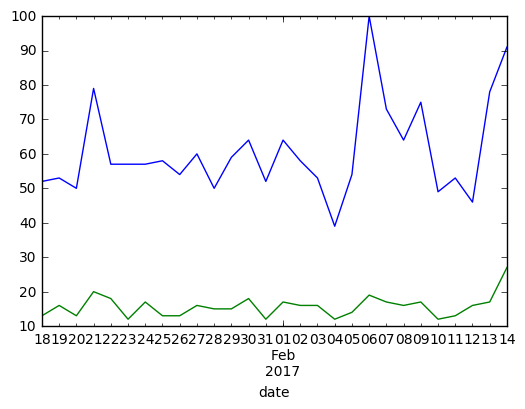

In [204]:
#Here are the two original series
merged['ukip_'].plot(label='thirty day')
merged['ukip'].plot(label='ninety day')

For each realization we can multiply it by the average ratio of its values in the other series. The resulting red lines show that the fit tends to be quite noisy.

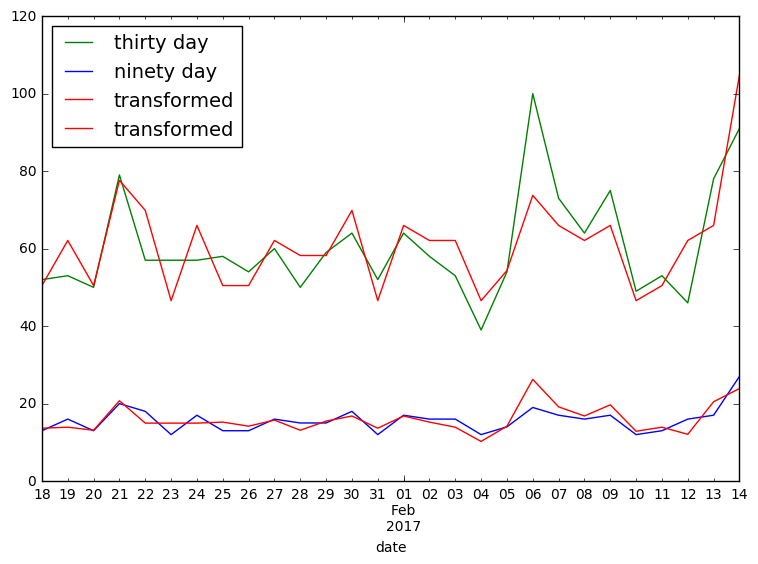

In [205]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

merged['ukip_'].plot(label='thirty day',color='green')
merged['ukip'].plot(label='ninety day',color='blue')
(merged['ukip_']*merged['ukip_ratio'].mean()).plot(label='transformed',color='red')
(merged['ukip']*merged['ukip_ratio_2'].mean()).plot(label='transformed',color='red')
legend = ax.legend(loc='upper left', shadow=False,fontsize=14)

Since these data contain the relative trends for two groups we can also assess if the distance between the two groups is constant across the two series. For each series we subtract ukip from bf and take the absolute value to get the distance between them. We then normalize this value so that it is comparable across the two realizations.

In [212]:
merged['dist30'] = abs(merged['bf_']-merged['ukip_'])

In [213]:
merged['dist90'] = abs(merged['bf']-merged['ukip'])

In [214]:
merged

,ukip_,bf_,ukip,bf,ukip_ratio,ukip_ratio_2,dist30,dist90
date,,,,,,,,
2017-01-18,53.0,10.0,14,3,1.250000,5.000000,43.0,11
2017-01-19,54.0,11.0,17,3,1.301887,4.312500,43.0,14
2017-01-20,51.0,12.0,14,5,1.260000,4.846154,39.0,9
2017-01-21,80.0,11.0,21,3,1.253165,4.950000,69.0,18
2017-01-22,58.0,13.0,19,3,1.315789,4.166667,45.0,16
2017-01-23,58.0,14.0,13,3,1.210526,5.750000,44.0,10
2017-01-24,58.0,14.0,18,4,1.298246,4.352941,44.0,14
2017-01-25,59.0,11.0,14,3,1.224138,5.461538,48.0,11
2017-01-26,55.0,8.0,14,4,1.240741,5.153846,47.0,10


In [222]:
from scipy.stats import zscore
merged = merged.apply(zscore)

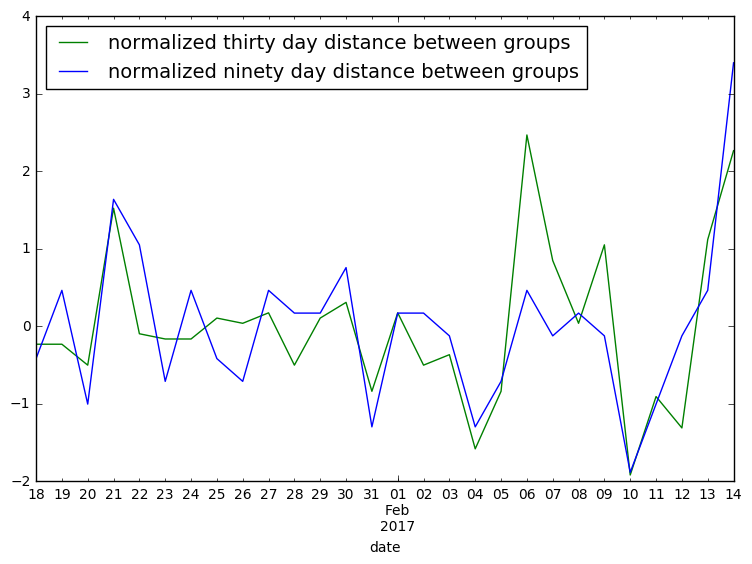

In [223]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

merged['dist30'].plot(label='normalized thirty day distance between groups',color='green')
merged['dist90'].plot(label='normalized ninety day distance between groups',color='blue')
legend = ax.legend(loc='upper left', shadow=False,fontsize=14)

In [224]:
merged['dist30_ratio'] = merged['dist30']/merged['dist90'] #ratio of thirty day to ninety day
#merged['ukip_ratio_2'] = merged['ukip_']/merged['ukip'] #ratio of ninety to thirty day

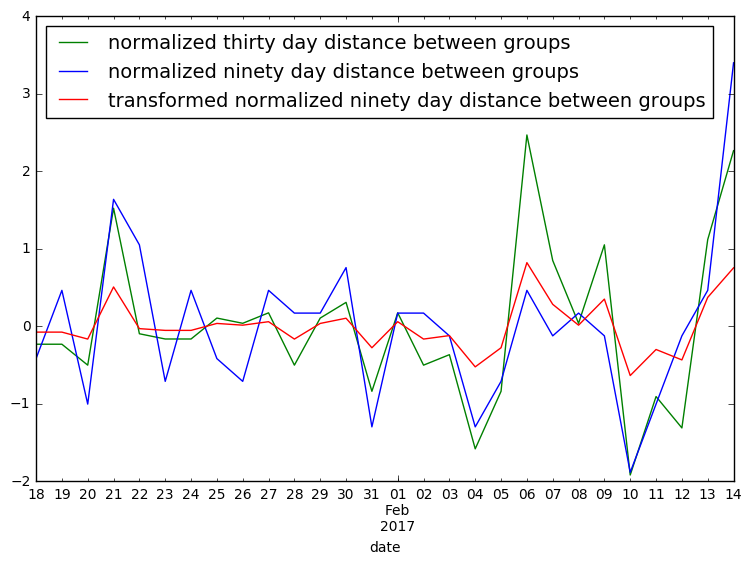

In [229]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

merged['dist30'].plot(label='normalized thirty day distance between groups',color='green')
merged['dist90'].plot(label='normalized ninety day distance between groups',color='blue')
(merged['dist30']*merged['dist30_ratio'].mean()).plot(label='transformed normalized ninety day distance between groups',color='red')
legend = ax.legend(loc='upper left', shadow=False,fontsize=14)

It appears that the same problem occurs here, that the distance between the groups is different for each realization and that attempts at transformation using the mean ratio between the values of the two series return a noisy approximation of the original series. 

Overall these results suggest that attempting to exploit overlapping time periods to reconstruct a long daily series may result in the production of a large amount of noise. Unless Google provides this functionality or gives more information about how to convert between series it seems that using the weekly data provided is probably a better option.